# 一、全连接神经网络
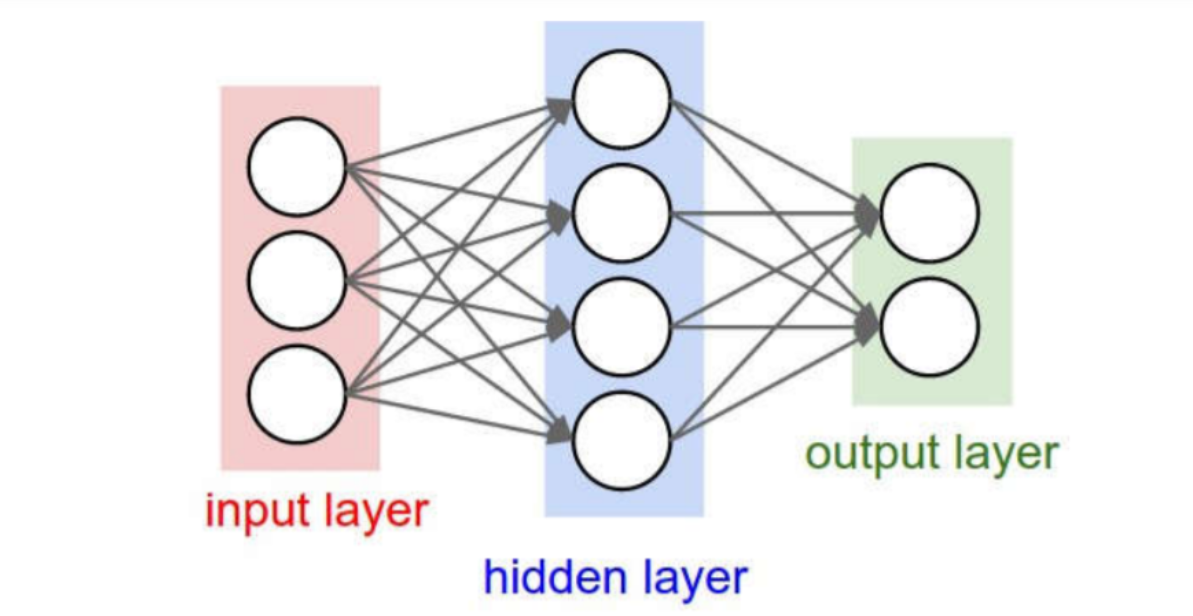

* 神经元按照层来布局，最左边的层叫做输入层，负责接收输入数据，最右边的层叫输出层，我们可以从这一层获取神经网络的输出数据。输入层与输出层之间的层叫做隐藏层。对外部不可见。
* 同一层神经元之间没有连接
* 第N层的每个神经元和第N-1层的所有神经元相连。
* 第N-1层的神经元的输出就是第N层神经元的输入
* 每个连接都有一个权值

# 多层全链接神经网络的实现
## 思路
- 下面利用Torch的最基本的封装来实现一个全链接神经网络，对鸢尾花进行分类。构建的神经网络结构为：
    - 4 -> 12 -> 6  -> 3
        - 两个隐藏层；
        - 多分类：三类鸢尾花
    - 实现思路：
        - 预测模型：
            - 采用默认求导实现
            - 激活函数采用sigmoid（可以选择其他）
        - 损失模型：
            - 采用交叉熵损失函数（可以选择其他）

In [6]:
# 全连接
#150 4
import torch 
#1层 150数量 4个特征     4个神经元
a = torch.Tensor(150,4)
print(a.shape)

#2层  12 4个特征的w   12个神经元
w1 =  torch.Tensor(12,4)
b1 = torch.Tensor(1)
b= torch.nn.functional.linear(a, w1, b1)
print(b.shape)

#3层  12 6个特征的w   6个神经元   
w2 =  torch.Tensor(6,12)
b2 = torch.Tensor(1)
c = torch.nn.functional.linear(b, w2, b2)
print(c.shape)

#4层 6  3个特征的w  3个神经元
w3 =  torch.Tensor(3,6)
b3 = torch.Tensor(1)
d = torch.nn.functional.linear(c, w3, b3)
print(d.shape)


torch.Size([150, 4])
torch.Size([150, 12])
torch.Size([150, 6])
torch.Size([150, 3])


In [9]:
# 代码实现
import torch
import sklearn.datasets
from sklearn.model_selection import train_test_split
# 1. 准备数据 --------------------
data, target = sklearn.datasets.load_iris(return_X_y=True)

x = torch.Tensor(data)     # 全部150个样本，一共三类
y = torch.LongTensor(target)    # 使用交叉熵需要LongTensor
# x 150 4
# y 150


# 2. 准备预测模型 ----------------
w1 = torch.randn(12, 4)    # 前面输出特征，后面输入（上一层）特征
b1 =  torch.randn(12)       # 输出特征
w1.requires_grad=True
b1.requires_grad=True

w2 = torch.randn(6, 12)    # 前面输出特征，后面输入特征
b2 =  torch.randn(6)       # 输出特征
w2.requires_grad=True
b2.requires_grad=True

w3 = torch.randn(3, 6)    # 前面输出特征，后面输入特征
b3 =  torch.randn(3)       # 输出特征
w3.requires_grad=True
b3.requires_grad=True




# ###########模型运算结构##############
def forward(input):   
    # 150*4
    
    # 150*12
    o1 = torch.nn.functional.linear(input, w1, b1)
    # 激活函数 x<0 y_=0
    y1 = torch.nn.functional.relu(o1)
    #x1 下一层输入 
    x1 = y1
    
    # 150*6
    o2= torch.nn.functional.linear(x1, w2, b2)
    # 激活函数 x<0 y_=0
    y2 = torch.nn.functional.relu(o2) 
    x2 = y2
    
    # 150*3
    o3= torch.nn.functional.linear(x2, w3, b3)
    return o3


# 迭代轮数
epoch = 20000


# 学习率
learn_rate = 0.01

#迭代轮数
for n in range(epoch):
    #每次就是全部样本
    y_= forward(x)
    
    # 计算损失 损失函数
    loss = torch.nn.functional.cross_entropy(y_, y)
    
    # 操作求导
    loss.backward(retain_graph=True)
    
    # 没有操作记录的代码款 来更新梯度
    with torch.autograd.no_grad():   
        w1 -= learn_rate * w1.grad
        b1 -= learn_rate * b1.grad
        w2 -= learn_rate * w2.grad
        b2 -= learn_rate * b2.grad
        w3 -= learn_rate * w3.grad
        b3 -= learn_rate * b3.grad
        
        # 清空上一轮的梯度
        w1.grad.zero_()
        b1.grad.zero_()
        w2.grad.zero_()
        b2.grad.zero_()
        w3.grad.zero_()
        b3.grad.zero_()
        
    if n % 1000 == 0:
        print(F"损失值：{loss.detach().numpy():8.6f}, ", end="")
        # dim=1按照行来计算 dim = 0 按照列来计算
         # y_=150* [1.124124, 12.231,14213] 
        y_ = y_.log_softmax(dim=1)    # 有使用交叉熵，其中做了一个log_softmax运算，所以这儿也作为概率使用，并调用了log_softmax运算
        # y_=150* [.2, .3,.5]
        
        #predict =150* y_概率最大的下标    150*（0/1/2）
        predict = y_.argmax(dim=1) 
        # print(predict)
        # 准确率 
        print(F"\t训练集测试准确度：{(predict == y).float().mean()*100:8.2f}%")


损失值：16.049566, 	训练集测试准确度：   33.33%
损失值：0.120485, 	训练集测试准确度：   94.67%
损失值：0.080190, 	训练集测试准确度：   96.00%
损失值：0.065263, 	训练集测试准确度：   97.33%
损失值：0.057570, 	训练集测试准确度：   98.00%
损失值：0.052952, 	训练集测试准确度：   98.00%
损失值：0.049890, 	训练集测试准确度：   98.00%
损失值：0.047726, 	训练集测试准确度：   98.00%
损失值：0.046134, 	训练集测试准确度：   98.00%
损失值：0.044929, 	训练集测试准确度：   98.00%
损失值：0.044723, 	训练集测试准确度：   98.67%
损失值：0.046729, 	训练集测试准确度：   98.67%
损失值：0.046613, 	训练集测试准确度：   98.67%
损失值：0.046368, 	训练集测试准确度：   98.67%
损失值：0.046069, 	训练集测试准确度：   98.67%
损失值：0.045749, 	训练集测试准确度：   98.67%
损失值：0.045412, 	训练集测试准确度：   98.67%
损失值：0.045123, 	训练集测试准确度：   98.67%
损失值：0.044836, 	训练集测试准确度：   98.67%
损失值：0.044559, 	训练集测试准确度：   98.67%
